# Advanced

## Task 01: Investigate the influence of one medieval author on another using intertextual analysis.

Identify and analyze textual similarities between the works of two authors to determine the extent of influence or borrowing. The code explores both intertextual and thematic similarities between two sets of medieval-style texts. It uses TF-IDF vectorization and cosine similarity to quantify text similarity. It then visualizes these similarities in a heatmap and a network graph, and finally, it delves into thematic analysis by counting occurrences of words related to specific themes.

Hints:
- Look for direct quotations, paraphrases, or allusions to the works of the other author.
- Consider the historical context and the relationship between the two authors.


**Libraries:**

* **numpy:** For numerical operations.
* **pandas:** For data manipulation and analysis.
* **matplotlib.pyplot:** For plotting.
* **seaborn:** For enhanced data visualization.
* **sklearn:**
    * `feature_extraction.text`: For TF-IDF vectorization.
    * `metrics.pairwise`: For calculating cosine similarity.
* **networkx:** For creating and visualizing network graphs.
* **collections.defaultdict:** Provides convenient dictionary-like storage.

**Code Walkthrough:**

1. **Data Loading and Preprocessing:**
   * Load sample medieval-style texts for two authors.
   * The code assumes minimal preprocessing, as it relies on TF-IDF vectorization to handle tokenization and weighting.

2. **Similarity Calculation:**
   * Define a function `calculate_similarity` that uses TF-IDF to vectorize two texts and then computes cosine similarity between them.
   * Calculate pairwise similarities between all texts from both authors.

3. **Similarity Visualization:**
   * Create a heatmap using `seaborn` to visualize the pairwise similarity matrix.
   * Print the top 3 most similar text pairs, along with their similarity scores and original text.
   * Construct a network graph using `networkx` where nodes represent texts, and edges represent similarities above a certain threshold (0.3 in this case).
   * Visualize the network graph, with edge widths indicating similarity strength.

4. **Thematic Analysis:**
   * Define a dictionary `themes` with common themes (nature, romance, magic, warfare, tragedy) and associated keywords.
   * Count the occurrences of these keywords in each text for both authors.
   * Create a DataFrame to store the theme counts.
   * Visualize the thematic similarities between the two authors using a bar chart.


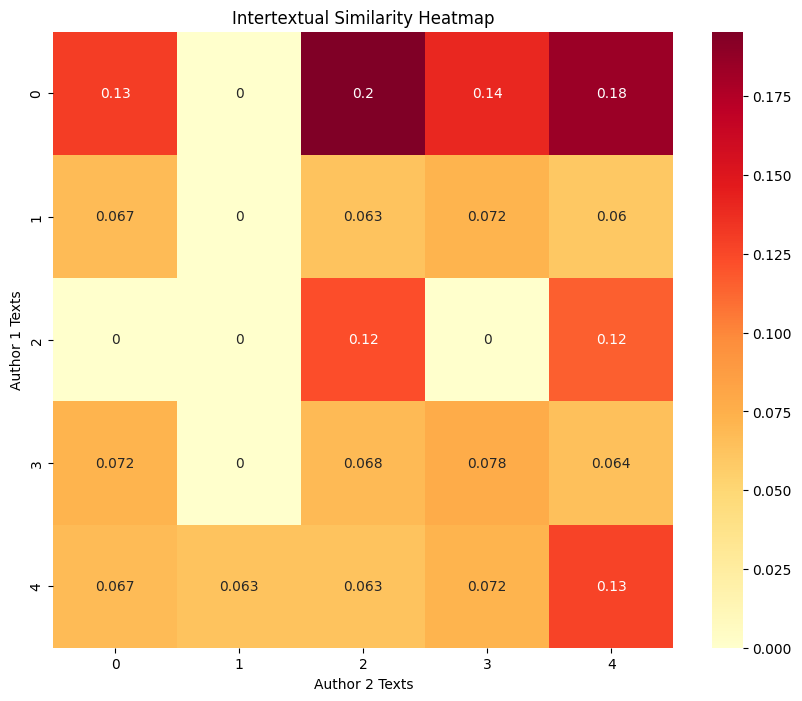

Top 3 Most Similar Text Pairs:
Author 1 Text 0.0 and Author 2 Text 2.0: 0.20
Author 1: The knight's sword gleamed in the pale moonlight.
Author 2: Across the sea, great wyrms rest in timeworn grottos.

Author 1 Text 0.0 and Author 2 Text 4.0: 0.18
Author 1: The knight's sword gleamed in the pale moonlight.
Author 2: The realm, once mighty, now lies in decay and woe.

Author 1 Text 0.0 and Author 2 Text 3.0: 0.14
Author 1: The knight's sword gleamed in the pale moonlight.
Author 2: Mystical power surged through the mage's rod.



<ipython-input-1-cec3857c7d8d>:83: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


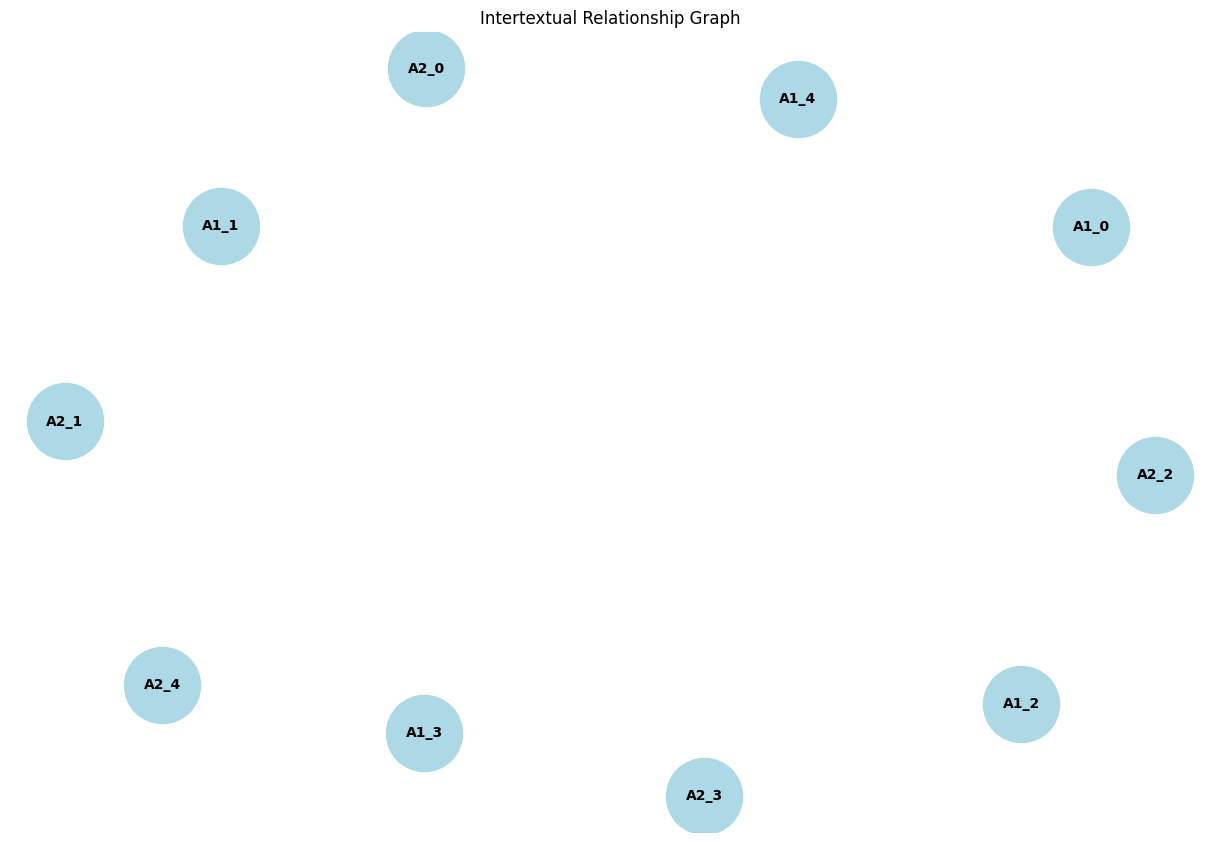

<Figure size 1000x600 with 0 Axes>

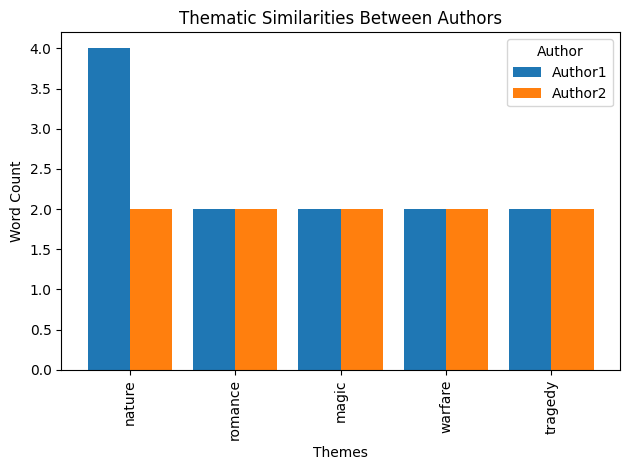

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
from collections import defaultdict

# Create dummy data for two medieval authors
author1_texts = [
    "The knight's sword gleamed in the pale moonlight.",
    "Fair maiden, thy beauty doth outshine the sun.",
    "In distant lands, dragons slumber in ancient caves.",
    "The wizard's staff crackled with arcane energy.",
    "Alas, the kingdom fell to ruin and despair."
]

author2_texts = [
    "Lo, the warrior's blade shimmered 'neath Luna's gaze.",
    "Sweet lady, your visage puts Sol himself to shame.",
    "Across the sea, great wyrms rest in timeworn grottos.",
    "Mystical power surged through the mage's rod.",
    "The realm, once mighty, now lies in decay and woe."
]

# Function to calculate similarity between two texts
def calculate_similarity(text1, text2):
    "USE TF-IDF VECTORIZER HERE"

# CALCULATE PAIRWISE SIMILARITIES IF THERE ARE TWO AUTHORS
similarities = []
"HERE"


# Create a DataFrame of similarities
df_similarities = pd.DataFrame(similarities, columns=['Author1_Text', 'Author2_Text', 'Similarity'])

# Visualize the similarity matrix
plt.figure(figsize=(10, 8))
similarity_matrix = df_similarities.pivot(index="Author1_Text", columns="Author2_Text", values="Similarity")
sns.heatmap(similarity_matrix, annot=True, cmap='YlOrRd')
plt.title("Intertextual Similarity Heatmap")
plt.xlabel("Author 2 Texts")
plt.ylabel("Author 1 Texts")
plt.show()

# Identify the most similar pairs of texts
top_similarities = df_similarities.sort_values('Similarity', ascending=False).head(3)
print("Top 3 Most Similar Text Pairs:")
for _, row in top_similarities.iterrows():
    print(f"Author 1 Text {row['Author1_Text']} and Author 2 Text {row['Author2_Text']}: {row['Similarity']:.2f}")
    print(f"Author 1: {author1_texts[int(row['Author1_Text'])]}")
    print(f"Author 2: {author2_texts[int(row['Author2_Text'])]}")
    print()

# Create a graph of intertextual relationships
G = nx.Graph()
for i, text in enumerate(author1_texts):
    G.add_node(f"A1_{i}", bipartite=0)
for i, text in enumerate(author2_texts):
    G.add_node(f"A2_{i}", bipartite=1)

for _, row in df_similarities.iterrows():
    if row['Similarity'] > 0.3:  # Only add edges for similarities above a threshold
        G.add_edge(f"A1_{int(row['Author1_Text'])}", f"A2_{int(row['Author2_Text'])}",
                   weight=row['Similarity'])

# Visualize the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue',
        node_size=3000, font_size=10, font_weight='bold')

edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Intertextual Relationship Graph")
plt.axis('off')
plt.tight_layout()
plt.show()

# Analyze thematic similarities
themes = {
    'nature': ['moonlight', 'sun', 'dragons', 'caves', 'sea', 'wyrms'],
    'romance': ['maiden', 'beauty', 'lady', 'visage'],
    'magic': ['wizard', 'arcane', 'mystical', 'mage'],
    'warfare': ['knight', 'sword', 'warrior', 'blade'],
    'tragedy': ['ruin', 'despair', 'decay', 'woe']
}

def count_theme_words(text, theme_words):
    return sum(1 for word in theme_words if word in text.lower())

theme_counts = defaultdict(lambda: {'Author1': 0, 'Author2': 0})

for theme, words in themes.items():
    for text in author1_texts:
        theme_counts[theme]['Author1'] += count_theme_words(text, words)
    for text in author2_texts:
        theme_counts[theme]['Author2'] += count_theme_words(text, words)

df_themes = pd.DataFrame(theme_counts).T

# Visualize thematic similarities
plt.figure(figsize=(10, 6))
df_themes.plot(kind='bar', width=0.8)
plt.title("Thematic Similarities Between Authors")
plt.xlabel("Themes")
plt.ylabel("Word Count")
plt.legend(title="Author")
plt.tight_layout()
plt.show()

## Solution

1:
```
def calculate_similarity(text1, text2):
    vectorizer = TfidfVectorizer().fit_transform([text1, text2])
    return cosine_similarity(vectorizer[0:1], vectorizer[1:2])[0][0]
```

2:
```
similarities = []
for i, text1 in enumerate(author1_texts):
    for j, text2 in enumerate(author2_texts):
        sim = calculate_similarity(text1, text2)
        similarities.append((i, j, sim))
```

